In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('Cleaned_TweetsData.csv',index_col=0)

In [25]:
df.head()

,cleaned_text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercials experienc...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


In [26]:
le=LabelEncoder()
df['airline_sentiment']=le.fit_transform(df['airline_sentiment'])

In [27]:
df.head()

,cleaned_text,airline_sentiment
0,virginamerica dhepburn said,1
1,virginamerica plus added commercials experienc...,2
2,virginamerica today must mean need take anothe...,1
3,virginamerica really aggressive blast obnoxiou...,0
4,virginamerica really big bad thing,0


In [28]:
X=df['cleaned_text']
y=df['airline_sentiment']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
tf=TfidfVectorizer()

In [31]:
X_train_tf=tf.fit_transform(X_train)  #we always fit transform on train data & just transform on test data

In [32]:
X_test_tf=tf.transform(X_test)

In [33]:
X_train_tf

<10248x11020 sparse matrix of type '<class 'numpy.float64'>'
	with 99924 stored elements in Compressed Sparse Row format>

In [34]:
X_train_tf.shape

(10248, 11020)

In [35]:
X_train_tf.toarray()  #X_train_tf and X_test_tf is a sparse matrix so to see its elements we use toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
#convert sparse to dense matrix
X_train_tf=scipy.sparse.csr_matrix.todense(X_train_tf)
X_test_tf=scipy.sparse.csr_matrix.todense(X_test_tf)

In [37]:
X_train_tf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
X_train_tf.shape

(10248, 11020)

In [15]:
model=Sequential([
    Dense(11000,activation='relu',input_shape=(X_train_tf.shape[1],)),
    Dense(500,activation='relu'),
    Dense(3,activation='softmax')])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11000)             121231000 
                                                                 
 dense_1 (Dense)             (None, 500)               5500500   
                                                                 
 dense_2 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 126,733,003
Trainable params: 126,733,003
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='Adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(X_train_tf,y_train,batch_size=200,epochs=10,validation_data=(X_test_tf,y_test))

Epoch 1/10
52/52 [==============================] - 44s 832ms/step - loss: 0.6611 - accuracy: 0.7178 - val_loss: 0.5471 - val_accuracy: 0.7812
Epoch 2/10
52/52 [==============================] - 42s 808ms/step - loss: 0.2234 - accuracy: 0.9232 - val_loss: 0.6324 - val_accuracy: 0.7810
Epoch 3/10
52/52 [==============================] - 41s 790ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 0.9253 - val_accuracy: 0.7684
Epoch 4/10
52/52 [==============================] - 41s 783ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.9786 - val_accuracy: 0.7655
Epoch 5/10
52/52 [==============================] - 39s 756ms/step - loss: 0.0216 - accuracy: 0.9940 - val_loss: 1.0384 - val_accuracy: 0.7705
Epoch 6/10
52/52 [==============================] - 40s 765ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 1.1207 - val_accuracy: 0.7750
Epoch 7/10
52/52 [==============================] - 40s 773ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 1.1136 - val_accuracy: 0.7737

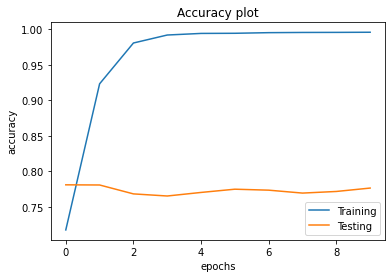

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy plot')
plt.legend(['Training','Testing'])

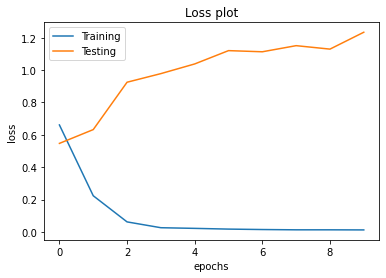

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss plot')
plt.legend(['Training','Testing'])